# Most Streamed Spotify (2023)
link: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [ ]:
#Importar biblioteca pandas:

import pandas as pd

In [ ]:
#Ler dataset
from google.colab import drive

drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/Dataset/spotify-2023.csv', encoding='ISO-8859-1')
pd.set_option('display.max_rows', None)

#Leitura dos dados:

dataset.head(10)

Mounted at /content/drive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [ ]:
#Informações do dataset:
dataset.info()

In [ ]:
#Limpar dados nulos:
dataset_clean = dataset.dropna()

# Top 10 Músicas mais reproduzidas (2023):

In [ ]:
#Selecionar as 10 músicas mais reproduzidas:

dataset["streams"] = pd.to_numeric(dataset["streams"], errors="coerce")
top_10 = dataset.nlargest(10, "streams")
print(top_10[["track_name", "streams"]])

                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09
162                                      One Dance  2.713922e+09
84                       STAY (with Justin Bieber)  2.665344e+09
140                                       Believer  2.594040e+09
725                                         Closer  2.591224e+09
48                                         Starboy  2.565530e+09


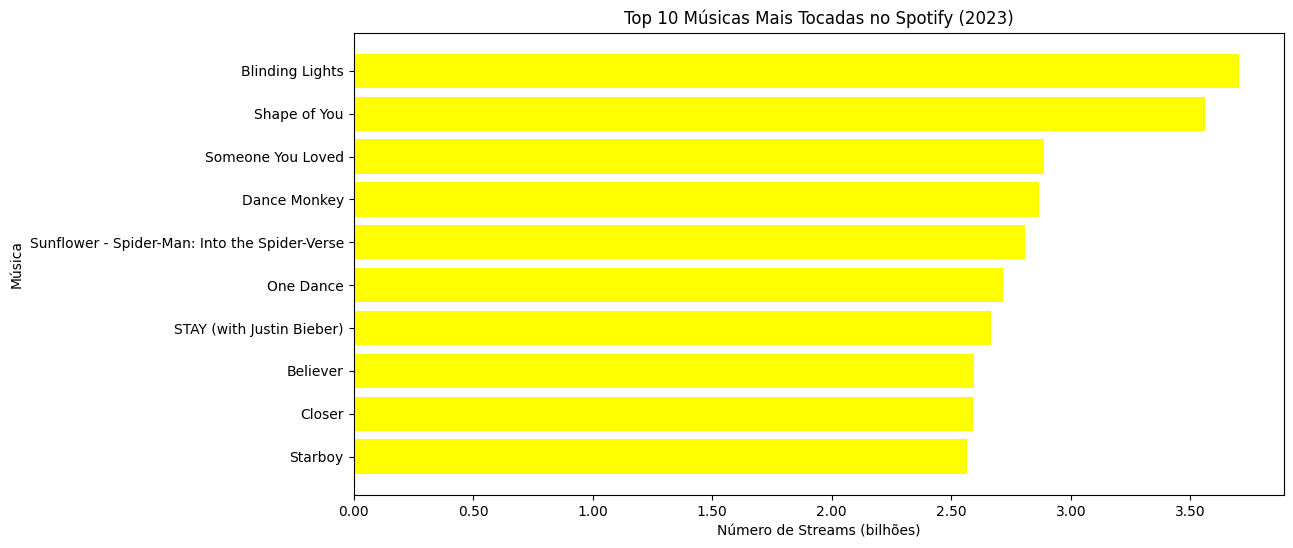

In [ ]:
#Criar um gráfico com essas informações:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_billions(x, pos):
    return f'{x * 1e-9:.2f}'

plt.figure(figsize=(12, 6))
plt.barh(top_10["track_name"], top_10["streams"], color="yellow")

plt.xlabel("Número de Streams (bilhões)")
plt.ylabel("Música")
plt.title("Top 10 Músicas Mais Tocadas no Spotify (2023)")

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_billions))

plt.gca().invert_yaxis()

plt.show()

In [ ]:
#Gerando uma tabela de %:

#Somar o total de streams do dataset:

total_streams = dataset["streams"].sum()

#Calcular a porcentagem de streams em relação ao total e ordenar:

dataset["stream_percentage"] = (dataset["streams"] / total_streams) * 100
top_10_percentage = dataset.nlargest(10, "streams")
top_10_percentage1 = top_10_percentage[["track_name", "stream_percentage"]]

DataFrame1 = pd.DataFrame(top_10_percentage1)


print(DataFrame1)

                                        track_name  stream_percentage
55                                 Blinding Lights           0.756733
179                                   Shape of You           0.727854
86                               Someone You Loved           0.589885
620                                   Dance Monkey           0.585298
41   Sunflower - Spider-Man: Into the Spider-Verse           0.573715
162                                      One Dance           0.554474
84                       STAY (with Justin Bieber)           0.544549
140                                       Believer           0.529981
725                                         Closer           0.529406
48                                         Starboy           0.524156


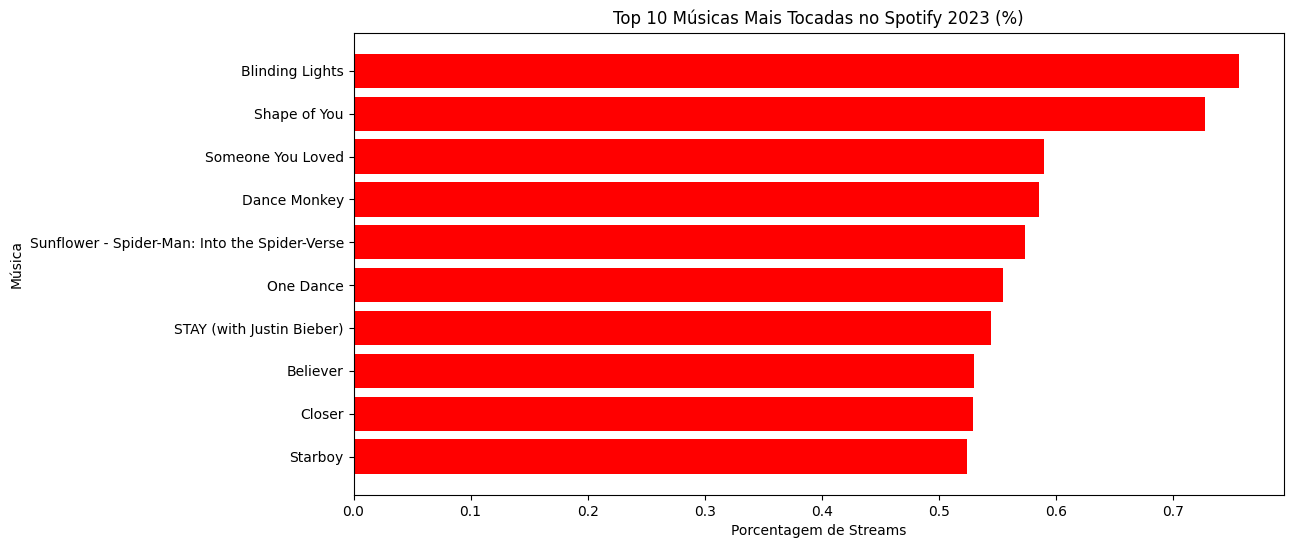

In [ ]:
#Gerando o gráfico (%):

plt.figure(figsize=(12, 6))
plt.barh(top_10_percentage["track_name"], top_10_percentage["stream_percentage"], color="red")

plt.xlabel("Porcentagem de Streams")
plt.ylabel("Música")
plt.title("Top 10 Músicas Mais Tocadas no Spotify 2023 (%)")
plt.gca().invert_yaxis()

plt.show()

# Top 10 artistas mais frequentes:

In [ ]:
#Selecionar os 10 artistas que mais aparecem (%):
artist_count = dataset["artist(s)_name"].value_counts()
artist_percentage = (artist_count / len(dataset)) * 100
top_10_artists = artist_percentage.head(10)

DataFrame2 = pd.DataFrame(artist_percentage.head(10))
DataFrame2.columns = ['Porcentagem']


print(DataFrame2)


                Porcentagem
artist(s)_name             
Taylor Swift       3.567681
The Weeknd         2.308499
SZA                1.993704
Bad Bunny          1.993704
Harry Styles       1.783841
Kendrick Lamar     1.259182
Morgan Wallen      1.154250
Ed Sheeran         0.944386
BTS                0.839454
Feid               0.839454


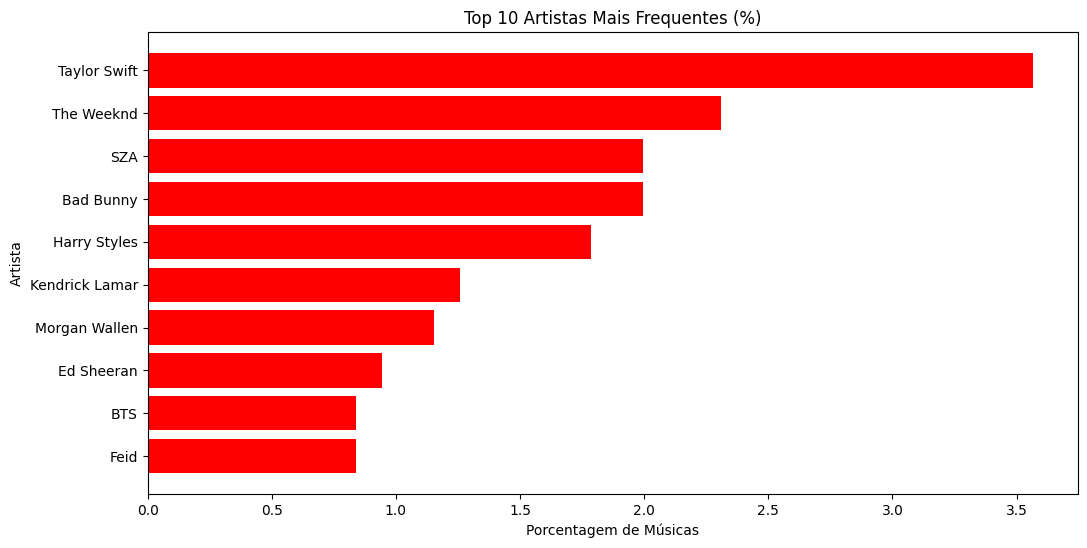

In [ ]:
#Gerando o gráfico (%)

plt.figure(figsize=(12, 6))
plt.barh(DataFrame2.index, DataFrame2['Porcentagem'], color="red")
plt.xlabel("Porcentagem de Músicas")
plt.ylabel("Artista")
plt.title("Top 10 Artistas Mais Frequentes (%)")
plt.gca().invert_yaxis()

plt.show()


# Top 10 músicas com mais aparições em playlists (2023):

In [ ]:
#Tabela da frequencia de aparição das musicas em playlists (top 10)

dataset["in_spotify_playlists"] = pd.to_numeric(dataset["in_spotify_playlists"], errors="coerce")
top_10 = dataset.nlargest(10, "in_spotify_playlists")
print(top_10[["track_name", "in_spotify_playlists"]])

                                    track_name  in_spotify_playlists
757                     Get Lucky - Radio Edit                 52898
630                             Mr. Brightside                 51979
720                    Wake Me Up - Radio Edit                 50887
624  Smells Like Teen Spirit - Remastered 2021                 49991
199                                 Take On Me                 44927
55                             Blinding Lights                 43899
162                                  One Dance                 43257
727               Somebody That I Used To Know                 42798
114          Everybody Wants To Rule The World                 41751
871                        Sweet Child O' Mine                 41231


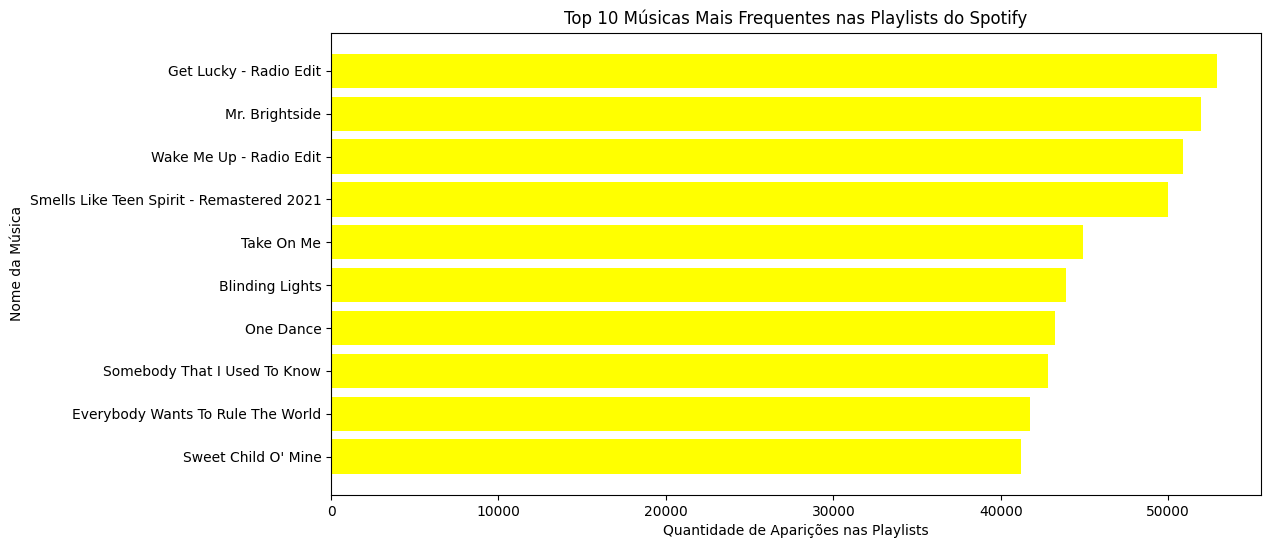

In [ ]:
#Gerando o gráfico:

plt.figure(figsize=(12, 6))

plt.barh(top_10["track_name"], top_10["in_spotify_playlists"], color="yellow")

plt.xlabel("Quantidade de Aparições nas Playlists")
plt.ylabel("Nome da Música")
plt.title("Top 10 Músicas Mais Frequentes nas Playlists do Spotify")

plt.gca().invert_yaxis()

plt.show()

In [ ]:
#Transformando o dataset em %

#Somar o total de playlist do dataset:

total_playlist = dataset["in_spotify_playlists"].sum()

#Calcular a porcentagem de streams em relação ao total e ordenar:

dataset["playlist_percentage"] = (dataset["in_spotify_playlists"] / total_playlist) * 100
top_10_playlist = dataset.nlargest(10, "in_spotify_playlists")
top_10_playlist1 = top_10_playlist[["track_name", "playlist_percentage"]]

DataFrame3 = pd.DataFrame(top_10_playlist1)



print(DataFrame3)

                                    track_name  playlist_percentage
757                     Get Lucky - Radio Edit             1.067413
630                             Mr. Brightside             1.048869
720                    Wake Me Up - Radio Edit             1.026834
624  Smells Like Teen Spirit - Remastered 2021             1.008754
199                                 Take On Me             0.906569
55                             Blinding Lights             0.885825
162                                  One Dance             0.872870
727               Somebody That I Used To Know             0.863608
114          Everybody Wants To Rule The World             0.842481
871                        Sweet Child O' Mine             0.831988


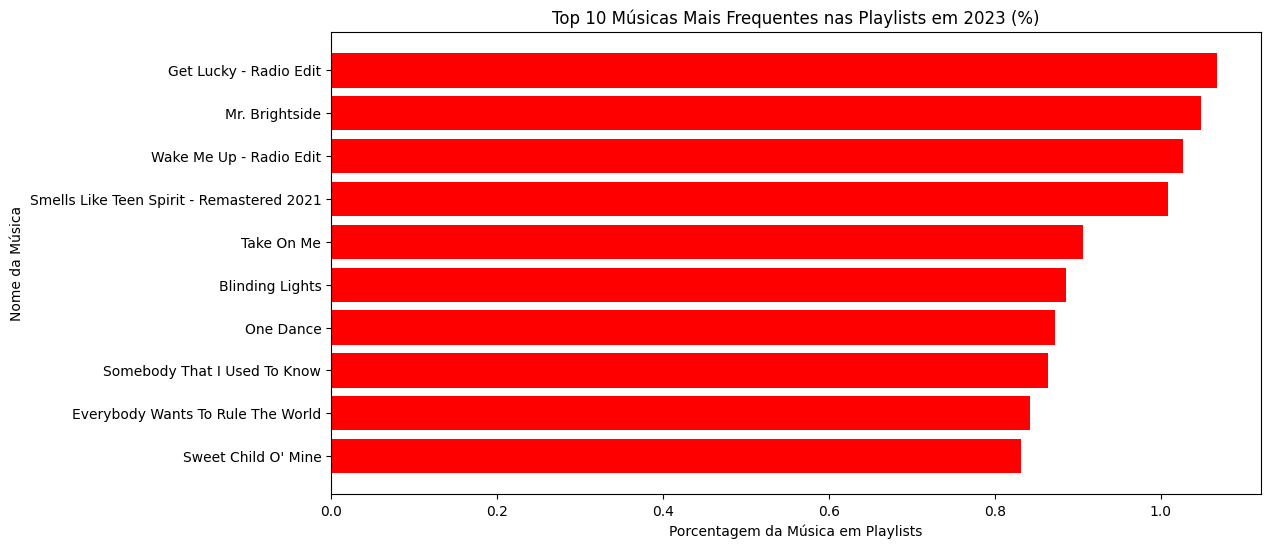

In [ ]:
#Gerando o gráfico (%)

plt.figure(figsize=(12, 6))
plt.barh(DataFrame3["track_name"], DataFrame3["playlist_percentage"], color="red")

plt.xlabel("Porcentagem da Música em Playlists")
plt.ylabel("Nome da Música")
plt.title("Top 10 Músicas Mais Frequentes nas Playlists em 2023 (%)")

plt.gca().invert_yaxis()

plt.show()

# Top 10 músicas com mais aparições nos "Spotify charts" (2023):

In [ ]:
#Tabela de aparição das musicas no "Spotify charts" (top 10)

dataset["in_spotify_charts"] = pd.to_numeric(dataset["in_spotify_charts"], errors="coerce")
top_10 = dataset.nlargest(10, "in_spotify_charts")
print(top_10[["track_name", "in_spotify_charts"]])

                                           track_name  in_spotify_charts
0                 Seven (feat. Latto) (Explicit Ver.)                147
14                                          As It Was                130
12                                            Flowers                115
2                                             vampire                113
22                                   I Wanna Be Yours                110
17  What Was I Made For? [From The Motion Picture ...                104
29            Dance The Night (From Barbie The Album)                101
3                                        Cruel Summer                100
13                                           Daylight                 98
5                                            Sprinter                 91


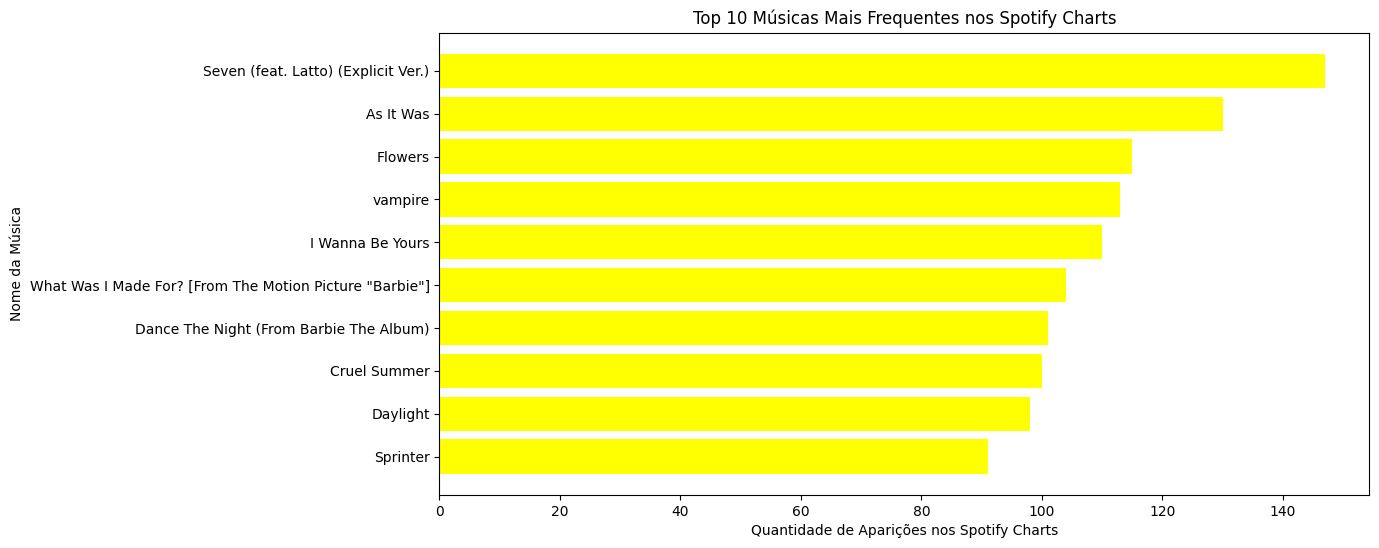

In [ ]:
#Gerando o gráfico:

plt.figure(figsize=(12, 6))

plt.barh(top_10["track_name"], top_10["in_spotify_charts"], color="yellow")

plt.xlabel("Quantidade de Aparições nos Spotify Charts")
plt.ylabel("Nome da Música")
plt.title("Top 10 Músicas Mais Frequentes nos Spotify Charts")

plt.gca().invert_yaxis()

plt.show()

In [ ]:
#Transformando o dataset em %

total_charts = dataset["in_spotify_charts"].sum()
dataset["charts_percentage"] = (dataset["in_spotify_charts"] / total_charts) * 100
top_10_charts = dataset.nlargest(10, "in_spotify_charts")
top_10_charts1 = top_10_charts[["track_name", "charts_percentage"]]

DataFrame4 = pd.DataFrame(top_10_charts1)

print(DataFrame4)

                                           track_name  charts_percentage
0                 Seven (feat. Latto) (Explicit Ver.)           1.284404
14                                          As It Was           1.135867
12                                            Flowers           1.004806
2                                             vampire           0.987331
22                                   I Wanna Be Yours           0.961118
17  What Was I Made For? [From The Motion Picture ...           0.908694
29            Dance The Night (From Barbie The Album)           0.882481
3                                        Cruel Summer           0.873744
13                                           Daylight           0.856269
5                                            Sprinter           0.795107


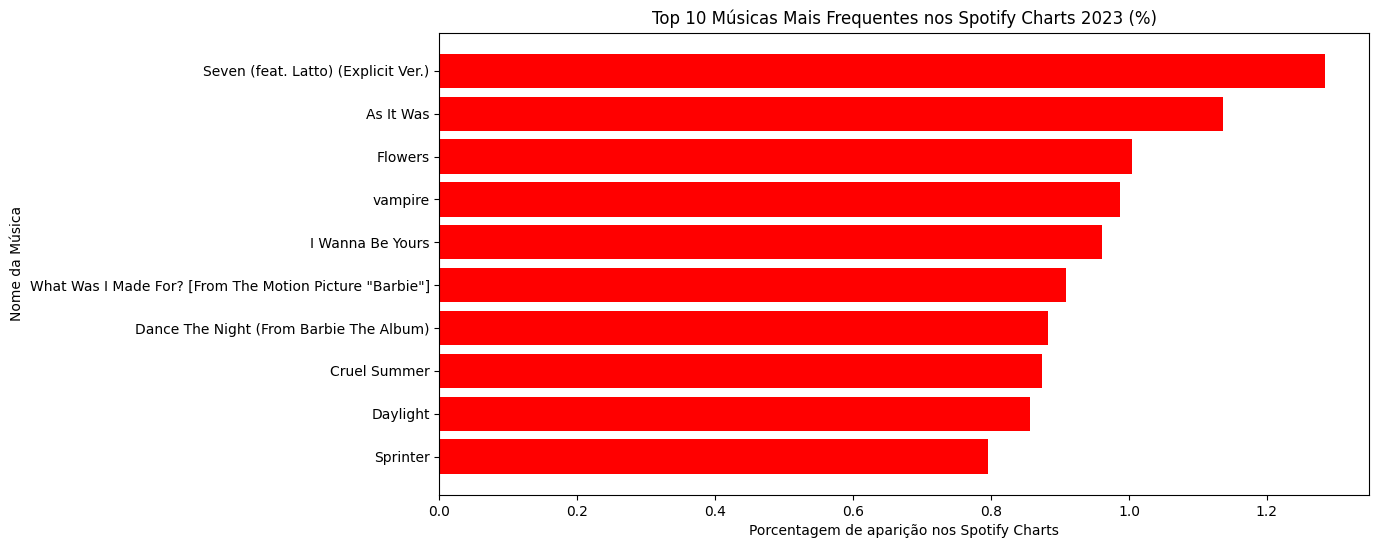

In [ ]:
#Gerando o gráfico (%)

plt.figure(figsize=(12, 6))
plt.barh(DataFrame4["track_name"], DataFrame4["charts_percentage"], color="red")

plt.xlabel("Porcentagem de aparição nos Spotify Charts")
plt.ylabel("Nome da Música")
plt.title("Top 10 Músicas Mais Frequentes nos Spotify Charts 2023 (%)")

plt.gca().invert_yaxis()

plt.show()

# Top 10 artistas com mais reproduções (2023):

In [ ]:
#Tabela com a quantidade de reproduções por artista (top 10):

artist_streams = dataset.groupby("artist(s)_name")["streams"].sum().reset_index()
artist_streams_ = artist_streams.sort_values(by="streams", ascending=False)
top_10_artistas = artist_streams_.head(10)

print(top_10_artistas)



NameError: name 'dataset' is not defined

In [ ]:
#Gerando o gráfico:
from matplotlib.ticker import FuncFormatter

def format_billions(x, pos):
    return f'{x * 1e-9:.2f}'

plt.figure(figsize=(12, 6))
plt.barh(top_10_artistas["artist(s)_name"], top_10_artistas["streams"], color="yellow")
plt.xlabel("Quantidade de Streams (Bilhões)")
plt.ylabel("Artista")
plt.title("Top 10 Artistas com Mais Streams (2023)")

plt.gca().invert_yaxis()

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_billions))

plt.show()


In [ ]:
#Transformando o data frame em %
total_streams = dataset["streams"].sum()

top_10_artists = top_10_artists.copy()
top_10_artists.loc[:, "stream_percentage"] = (top_10_artists["streams"] / total_streams) * 100


print(top_10_artists[["artist(s)_name", "stream_percentage"]])


In [ ]:
#Gerando o gráfico:

plt.figure(figsize=(12, 6))
plt.barh(top_10_artists["artist(s)_name"], top_10_artists["stream_percentage"], color="red")

plt.xlabel("Porcentagem de Streams")
plt.ylabel("Nome do Artista")
plt.title("Top 10 Artistas com Maior % de Streams no Spotify (2023)")

plt.gca().invert_yaxis()

plt.show()



# Anos em que houveram mais músicas lançadas:

In [ ]:
#Criando a tabela:

# Contar quantas músicas foram lançadas em cada ano
dataset_anos = dataset['released_year'].value_counts().reset_index()
dataset_anos.columns = ['Ano de Lançamento', 'Quantidade de Músicas']

# Ordernar por ordem decrescente
dataset_anos = dataset_anos.sort_values(by='Quantidade de Músicas', ascending=False, ignore_index=True)

# Exibir o DataFrame final
print(dataset_anos)

In [ ]:
#Gerando os gráficos:

import matplotlib.pyplot as plt
import numpy as np
import math

n = len(dataset_anos)
k = int(1 + 3.322 * math.log10(n))

intervalo = (dataset_anos['Ano de Lançamento'].max() - dataset_anos['Ano de Lançamento'].min()) / k

bins = np.arange(dataset_anos['Ano de Lançamento'].min(), dataset_anos['Ano de Lançamento'].max() + intervalo, intervalo)

# Gráfico 1: Contagem Absoluta
plt.figure(figsize=(10, 6))
plt.hist(dataset_anos['Ano de Lançamento'], bins=bins, color='yellow', edgecolor='black')
plt.title(f'Distribuição de Músicas por Ano\n(Valor Absoluto)', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Quantidade de Músicas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Porcentagem
plt.figure(figsize=(10, 6))

counts, bin_edges = np.histogram(dataset_anos['Ano de Lançamento'], bins=bins)

percentages = (counts / n) * 100

plt.bar(bin_edges[:-1], percentages, width=intervalo, color='red', edgecolor='black', align='edge')

plt.title(f'Distribuição de Músicas por Ano\n(%)', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Porcentagem de Músicas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Moda, média e mediana por coluna:

In [ ]:
colunas = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'released_year']

#tratar dados:
for coluna in colunas:
    dataset[coluna] = pd.to_numeric(dataset[coluna], errors='coerce')

dataset_clean = dataset.dropna(subset=colunas)

# Calcular média, mediana e moda para cada coluna
for coluna in colunas:
    media = dataset_clean[coluna].mean()
    mediana = dataset_clean[coluna].median()
    moda = dataset_clean[coluna].mode().iloc[0]

    print(f"{coluna}:")
    print(f"   Média: {media:.2f}")
    print(f"   Mediana: {mediana:.2f}")
    print(f"   Moda: {moda:.2f}\n")


# Moda, média e mediana dos gráficos criados:

In [5]:
import pandas as pd

# Garantindo que os dados sejam numéricos
dataset["streams"] = pd.to_numeric(dataset["streams"], errors="coerce")
dataset["in_spotify_playlists"] = pd.to_numeric(dataset["in_spotify_playlists"], errors="coerce")
dataset["in_spotify_charts"] = pd.to_numeric(dataset["in_spotify_charts"], errors="coerce")

# Filtrando os Top 10 de cada métrica
top_10_streams = dataset.nlargest(10, "streams")["streams"]
top_10_playlists = dataset.nlargest(10, "in_spotify_playlists")["in_spotify_playlists"]
top_10_charts = dataset.nlargest(10, "in_spotify_charts")["in_spotify_charts"]

# Função para calcular estatísticas
def calcular_estatisticas(coluna):
    moda = coluna.mode().iloc[0] if not coluna.mode().empty else None
    media = coluna.mean()
    mediana = coluna.median()
    return moda, media, mediana

# Calculando para cada Top 10
estatisticas = {
    "Top 10 Streams": calcular_estatisticas(top_10_streams),
    "Top 10 Playlists": calcular_estatisticas(top_10_playlists),
    "Top 10 Charts": calcular_estatisticas(top_10_charts),
}

# Exibindo os resultados
for categoria, (moda, media, mediana) in estatisticas.items():
    print(f"\n{categoria}:")
    print(f"Moda: {moda}")
    print(f"Média: {media}")
    print(f"Mediana: {mediana}")



Top 10 Streams:
Moda: 2565529693.0
Média: 2895662936.2
Mediana: 2761009450.0

Top 10 Playlists:
Moda: 41231
Média: 46361.8
Mediana: 44413.0

Top 10 Charts:
Moda: 91
Média: 110.9
Mediana: 107.0


# Desvio Padrão das colunas em que calculamos a média:

In [ ]:
colunas = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'released_year']

#Tratar dados:
for coluna in colunas:
    dataset[coluna] = pd.to_numeric(dataset[coluna], errors='coerce')

dataset_clean = dataset.dropna(subset=colunas)

# Calcular desvio padrão e CV
for coluna in colunas:
    media = dataset_clean[coluna].mean()
    desvio_padrao = dataset_clean[coluna].std()
    desvio_padrao_percentual = (desvio_padrao / media) * 100

    print(f"{coluna}:")
    print(f"   Desvio Padrão: {desvio_padrao:.2f}")
    print(f"   CV: {desvio_padrao_percentual:.2f}%\n")

in_spotify_playlists:
   Desvio Padrão: 7901.40
   CV: 151.88%

in_spotify_charts:
   Desvio Padrão: 19.58
   CV: 162.89%

streams:
   Desvio Padrão: 566856949.04
   CV: 110.25%

released_year:
   Desvio Padrão: 11.01
   CV: 0.55%



In [ ]:
'''
Conclusões:

Alta variabilidade nas colunas: "in_spotify_playlists", "in_spotify_charts" e "streams" (CVs superiores a 100%). o CV bem acima de 100% indica que, em média, esses dados têm grande dispersão, o que significa que algumas playlists ou charts têm muito mais músicas que outros e algumas músicas tem muito mais streams do que outras.

Baixa variabilidade na coluna "released_year" (CV de 0.55%). Indica que os anos de lançamento das músicas estão bastante concentrados em torno de uma mesma faixa, sem grandes flutuações.

'''

# Devio padrão dos gráficos que calculamos a média:

In [ ]:
import pandas as pd

# Garantindo que os dados sejam numéricos
dataset["streams"] = pd.to_numeric(dataset["streams"], errors="coerce")
dataset["in_spotify_playlists"] = pd.to_numeric(dataset["in_spotify_playlists"], errors="coerce")
dataset["in_spotify_charts"] = pd.to_numeric(dataset["in_spotify_charts"], errors="coerce")

# Filtrando os Top 10 de cada métrica
top_10_streams = dataset.nlargest(10, "streams")["streams"]
top_10_playlists = dataset.nlargest(10, "in_spotify_playlists")["in_spotify_playlists"]
top_10_charts = dataset.nlargest(10, "in_spotify_charts")["in_spotify_charts"]

# Função para calcular o CV (%)
def calcular_cv(coluna):
    media = coluna.mean()
    desvio_padrao = coluna.std()
    cv = (desvio_padrao / media) * 100 if media != 0 else None
    return cv

# Calculando CV para cada Top 10
cv_resultados = {
    "Top 10 Streams": calcular_cv(top_10_streams),
    "Top 10 Playlists": calcular_cv(top_10_playlists),
    "Top 10 Charts": calcular_cv(top_10_charts),
}

# Exibindo os resultados
for categoria, cv in cv_resultados.items():
    print(f"\n{categoria}:")
    print(f"Coeficiente de Variação (CV %): {cv:.2f}%")



Top 10 Streams:
Coeficiente de Variação (CV %): 14.03%

Top 10 Playlists:
Coeficiente de Variação (CV %): 9.80%

Top 10 Charts:
Coeficiente de Variação (CV %): 15.08%


# Assimetria e Curtose das colunas

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

colunas = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'released_year']

#Tratar dados:
for coluna in colunas:
    dataset[coluna] = pd.to_numeric(dataset[coluna], errors='coerce')

dataset_clean = dataset.dropna(subset=colunas)

#Calcular assimetria e curtose
for coluna in colunas:
    assimetria = skew(dataset_clean[coluna])
    curtose_valor = kurtosis(dataset_clean[coluna])

    print(f"{coluna}:")
    print(f"   Assimetria: {assimetria:.2f}")
    print(f"   Curtose: {curtose_valor:.2f}\n")


in_spotify_playlists:
   Assimetria: 2.92
   Curtose: 9.80

in_spotify_charts:
   Assimetria: 2.57
   Curtose: 8.45

streams:
   Assimetria: 2.00
   Curtose: 4.34

released_year:
   Assimetria: -4.34
   Curtose: 21.02



# Assimetria e curtose dos gráficos:

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Garantindo que os dados sejam numéricos
dataset["streams"] = pd.to_numeric(dataset["streams"], errors="coerce")
dataset["in_spotify_playlists"] = pd.to_numeric(dataset["in_spotify_playlists"], errors="coerce")
dataset["in_spotify_charts"] = pd.to_numeric(dataset["in_spotify_charts"], errors="coerce")

# Filtrando os Top 10 de cada métrica
top_10_streams = dataset.nlargest(10, "streams")["streams"]
top_10_playlists = dataset.nlargest(10, "in_spotify_playlists")["in_spotify_playlists"]
top_10_charts = dataset.nlargest(10, "in_spotify_charts")["in_spotify_charts"]

# Função para calcular assimetria e curtose
def calcular_assimetria_curtose(coluna):
    assimetria = skew(coluna)
    curtose_valor = kurtosis(coluna)
    return assimetria, curtose_valor

# Calculando para cada Top 10
estatisticas = {
    "Top 10 Streams": calcular_assimetria_curtose(top_10_streams),
    "Top 10 Playlists": calcular_assimetria_curtose(top_10_playlists),
    "Top 10 Charts": calcular_assimetria_curtose(top_10_charts),
}

# Exibindo os resultados
for categoria, (assimetria, curtose_valor) in estatisticas.items():
    print(f"\n{categoria}:")
    print(f"Assimetria: {assimetria:.4f}")
    print(f"Curtose: {curtose_valor:.4f}")



Top 10 Streams:
Assimetria: 1.2472
Curtose: -0.0213

Top 10 Playlists:
Assimetria: 0.3376
Curtose: -1.5966

Top 10 Charts:
Assimetria: 1.0386
Curtose: 0.2239


# Dashboard

Dropdown(description='Escolha a análise:', options=('Top 10 Músicas Mais Tocadas', 'Top 10 Artistas Mais Frequ…

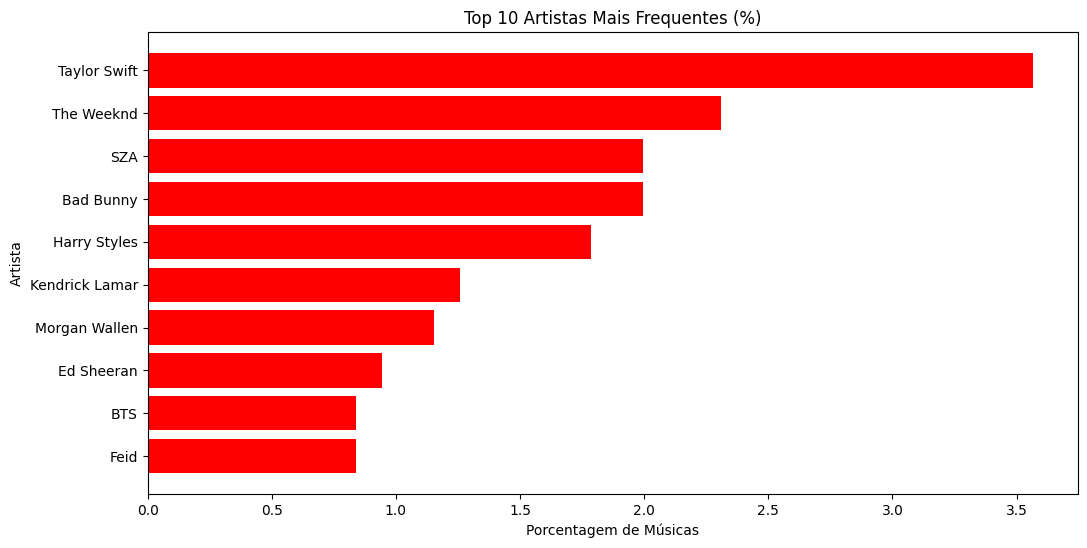

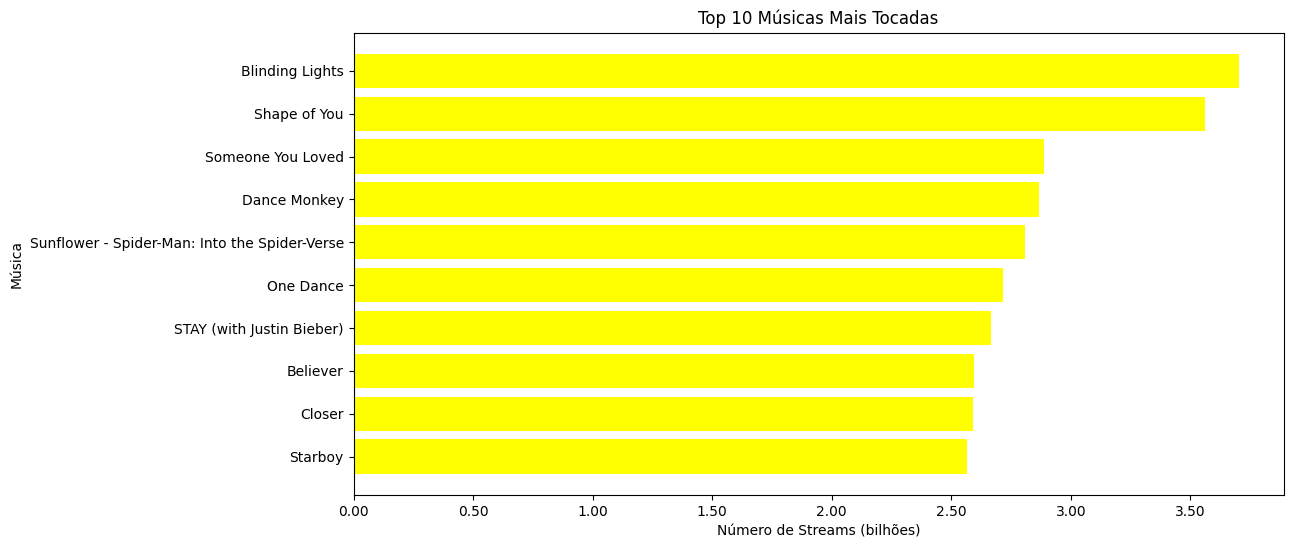

In [ ]:
!git clone https://github.com/Vinicius-Alexandre2005/teste.git
!pip install streamlit
